In [1]:
# Import the necessary packages.
import numpy as np
import pandas as pd

# read the dataset.
df = pd.read_csv('/content/global air pollution dataset.csv')


In [2]:
# view the top 5 rows
df.head(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
# helps to see the columns
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [4]:
# shape of the dataset
df.shape

(23463, 12)

In [5]:
# Replace 'your_column_name' with the actual column name
max_value = df['AQI Value'].max()

print(f'Maximum value in the column: {max_value}')

Maximum value in the column: 500


In [6]:
# felt less than 100 AQI good air
good_AQI_Country=df[df['AQI Value'] <=100]
# counting the number of countries less tha AQI air.
good_AQI_Country['Country'].value_counts().head(10)

,count
Country,
United States of America,2720
Brazil,1474
Germany,1344
Russian Federation,1228
Italy,944
France,769
India,723
Japan,687
Spain,425


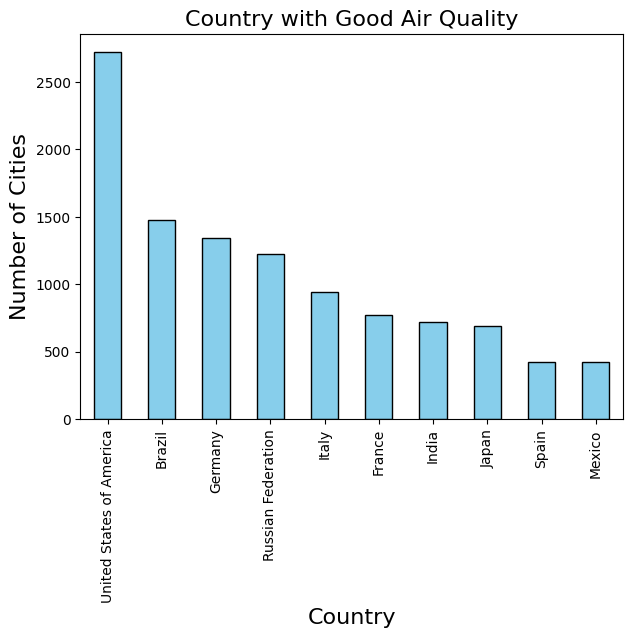

In [7]:
import matplotlib.pyplot as plt

def plot_top_countries_with_good_aqi(good_AQI_Country):
    """
    Plots a bar chart of the top 10 countries with the highest number of cities
    having good air quality.

        A DataFrame containing a column named 'Country' where each entry represents
        a city with a 'Good' air quality status.
    """
    # felt less than 100 AQI good air
    good_AQI_Country=df[df['AQI Value'] <=100]
# counting the number of countries less tha AQI air.
    good_AQI_Country['Country'].value_counts().head(10)
    plt.figure(figsize=(7,5))
    # Creating the bar plot
    good_AQI_Country['Country'].value_counts().head(10).plot.bar(color='skyblue', edgecolor='black')
    # Add the title for the plot.
    plt.title('Country with Good Air Quality', fontsize = 16)
    # Add the x and y labels to the plot.
    plt.ylabel('Number of Cities', fontsize = 16)
    plt.xlabel('Country', fontsize = 16)
    plt.show()
# Calling the function.
plot_top_countries_with_good_aqi(good_AQI_Country)

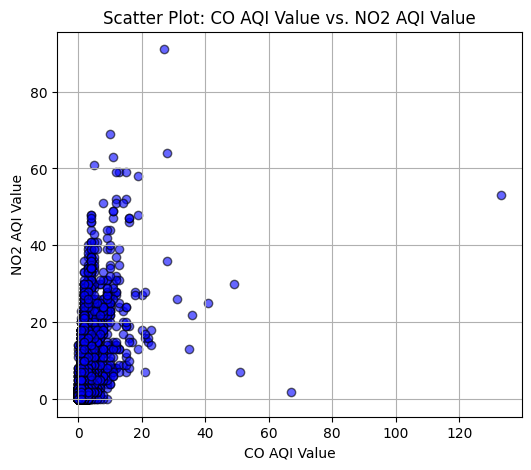

In [8]:
import matplotlib.pyplot as plt

def scatter_plot_co_vs_no2(df):
    """
    Creates and displays a scatter plot comparing CO AQI values with NO2 AQI values.

    df : pandas.DataFrame
        A DataFrame containing columns 'CO AQI Value' and 'NO2 AQI Value',
        representing Air Quality Index values for Carbon Monoxide (CO) and Nitrogen Dioxide (NO2), respectively.

    """
    # Adding the size of the figure.
    plt.figure(figsize=(6, 5))
    # constructing the scatter plot with the features.
    plt.scatter(df['CO AQI Value'], df['NO2 AQI Value'], color='blue', alpha=0.6, edgecolor='k')
    # Add the title
    plt.title('Scatter Plot: CO AQI Value vs. NO2 AQI Value')
    # Add the x labels and y labels to the plot.
    plt.xlabel('CO AQI Value')
    plt.ylabel('NO2 AQI Value')
    # Add grid to the plot.
    plt.grid(True)
    plt.show()
scatter_plot_co_vs_no2(df)

In [9]:
# Description of the data.
about_data = df.describe()
about_data

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [10]:
# Correlation between each column.
strength = df.corr(numeric_only=True)
strength

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.430602,0.405310,0.231758,0.984327
CO AQI Value,0.430602,1.000000,0.145724,0.488092,0.438557
Ozone AQI Value,0.405310,0.145724,1.000000,-0.181818,0.339887
NO2 AQI Value,0.231758,0.488092,-0.181818,1.000000,0.260127
PM2.5 AQI Value,0.984327,0.438557,0.339887,0.260127,1.000000


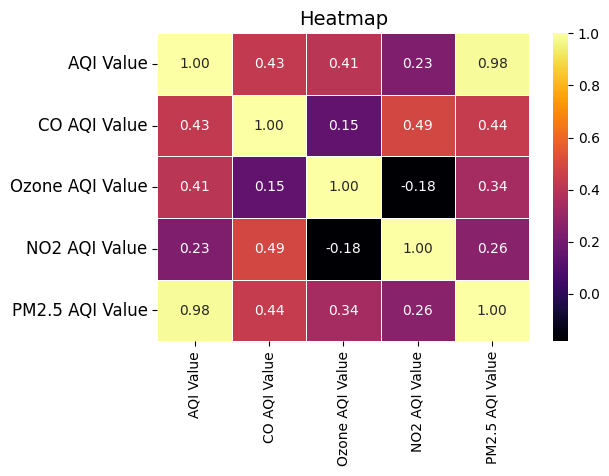

In [11]:
import seaborn as sns

def plot_heatmap(strength):
    """
    Plotting a heatmap of the correlation matrix.

    Parameters:
        correlation_matrix (DataFrame): Correlation matrix data.
        title (str, optional): Title of the plot. Defaults to 'Heatmap of Correlation matrix'.
    """
    plt.figure(figsize=(6, 4))
    # constructing the plot for  correlation matrtix
    sns.heatmap(strength, annot=True, cmap='inferno', linewidths=0.5, fmt='.2f', linecolor='white')
    # title for the heatmap
    plt.title("Heatmap", fontsize=14)
    # add the x ticks and y ticks.
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    # view the plot.
    plt.show()

# Calling the function.
plot_heatmap(strength)

In [12]:
def mean_data():

  """
    Calculating mean of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in features:
    mean_value = df[i].mean()
    print("Mean of", i, ":", mean_value)

features = [ 'AQI Value', 'CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
mean_data()


Mean of AQI Value : 72.01086817542513
Mean of CO AQI Value : 1.3683672164684824
Mean of Ozone AQI Value : 35.19370924434216
Mean of NO2 AQI Value : 3.0633337595362913
Mean of PM2.5 AQI Value : 68.51975450709628


In [13]:
def median_data():

  """
    Calculating median of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in features:
    median_value = df[i].median()
    print("Median of", i, ":", median_value)

features = [ 'AQI Value', 'CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
median_data()


Median of AQI Value : 55.0
Median of CO AQI Value : 1.0
Median of Ozone AQI Value : 31.0
Median of NO2 AQI Value : 1.0
Median of PM2.5 AQI Value : 54.0


In [14]:
def sandarddeviation_data():

  """
    Calculating standard deviation of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in features:
    sandarddeviation_value = df[i].std()
    print("standard deviation of", i, ":", sandarddeviation_value)

features = [ 'AQI Value', 'CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
sandarddeviation_data()


standard deviation of AQI Value : 56.05522025223699
standard deviation of CO AQI Value : 1.8320636838212414
standard deviation of Ozone AQI Value : 28.098723409526965
standard deviation of NO2 AQI Value : 5.254108426652154
standard deviation of PM2.5 AQI Value : 54.79644316021084


In [15]:
def skewness_data():

  """
    Calculating skewness of the columns, using loop.
    skew(): pre-defined module, imported from Statistics library.

  """
  for i in features:
    skewness_value = df[i].skew()
    print("skewness of", i, ":", skewness_value)

features = [ 'AQI Value', 'CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
skewness_data()


skewness of AQI Value : 3.2889126222707357
skewness of CO AQI Value : 23.084232216858382
skewness of Ozone AQI Value : 3.101750386086197
skewness of NO2 AQI Value : 3.793627544162518
skewness of PM2.5 AQI Value : 2.8232624208975357


In [16]:
def kurtosis_data():

  """
    Calculating skewness of the columns, using loop.
    kurtosis(): pre-defined module, imported from Statistics library.

  """
  for i in features:
    kurtosis_value = df[i].kurtosis()
    print("skewness of", i, ":", kurtosis_value)

features = [ 'AQI Value', 'CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
kurtosis_data()


skewness of AQI Value : 17.570008152132075
skewness of CO AQI Value : 1289.3491916450682
skewness of Ozone AQI Value : 12.123173070644519
skewness of NO2 AQI Value : 22.433481025624562
skewness of PM2.5 AQI Value : 13.622462979729383
